# Loss function (visualizar)

## MSE sin activacion

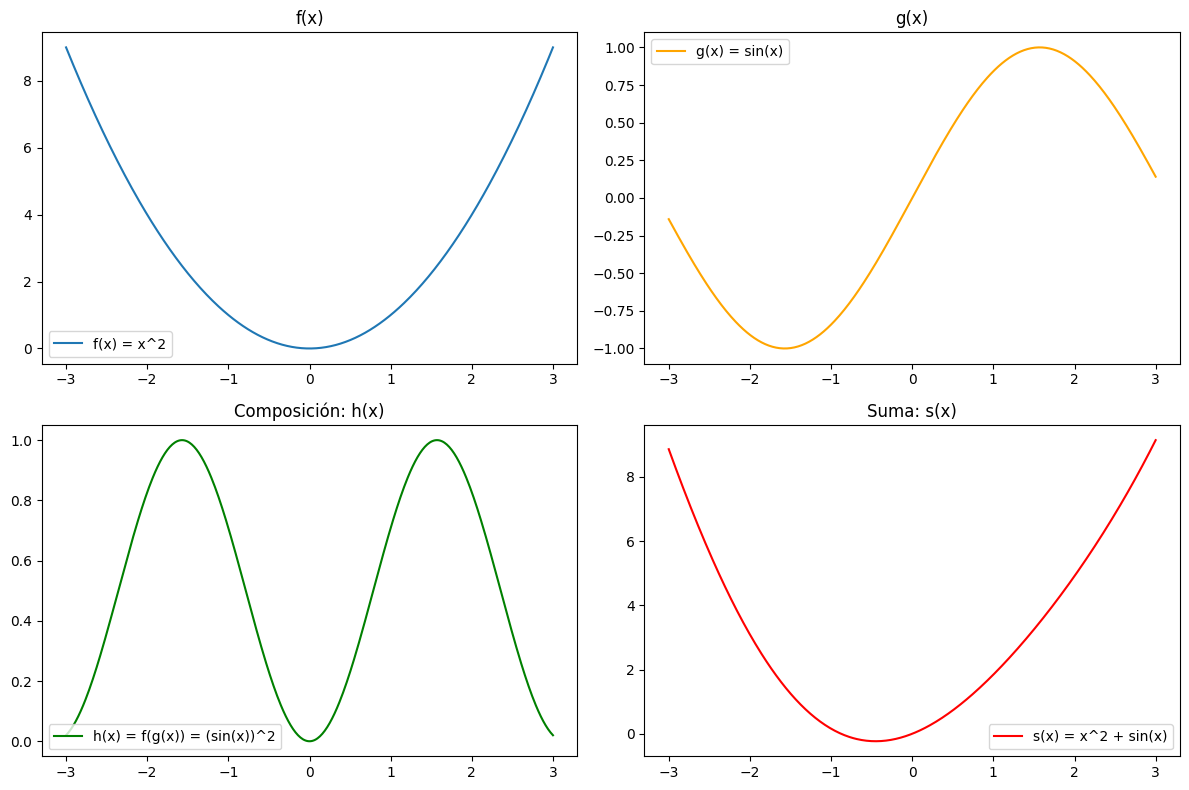

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos dos funciones diferenciables simples
def f(x):
    return x**2

def g(x):
    return np.sin(x)

# Composición: h(x) = f(g(x))
def h(x):
    return f(g(x))

# Suma: s(x) = f(x) + g(x)
def s(x):
    return f(x) + g(x)

# Dominio para graficar
x = np.linspace(-3, 3, 400)

plt.figure(figsize=(12, 8))

# Graficamos f(x)
plt.subplot(2, 2, 1)
plt.plot(x, f(x), label='f(x) = x^2')
plt.title('f(x)')
plt.legend()

# Graficamos g(x)
plt.subplot(2, 2, 2)
plt.plot(x, g(x), label='g(x) = sin(x)', color='orange')
plt.title('g(x)')
plt.legend()

# Graficamos h(x) = f(g(x))
plt.subplot(2, 2, 3)
plt.plot(x, h(x), label='h(x) = f(g(x)) = (sin(x))^2', color='green')
plt.title('Composición: h(x)')
plt.legend()

# Graficamos s(x) = f(x) + g(x)
plt.subplot(2, 2, 4)
plt.plot(x, s(x), label='s(x) = x^2 + sin(x)', color='red')
plt.title('Suma: s(x)')
plt.legend()

plt.tight_layout()
plt.show()

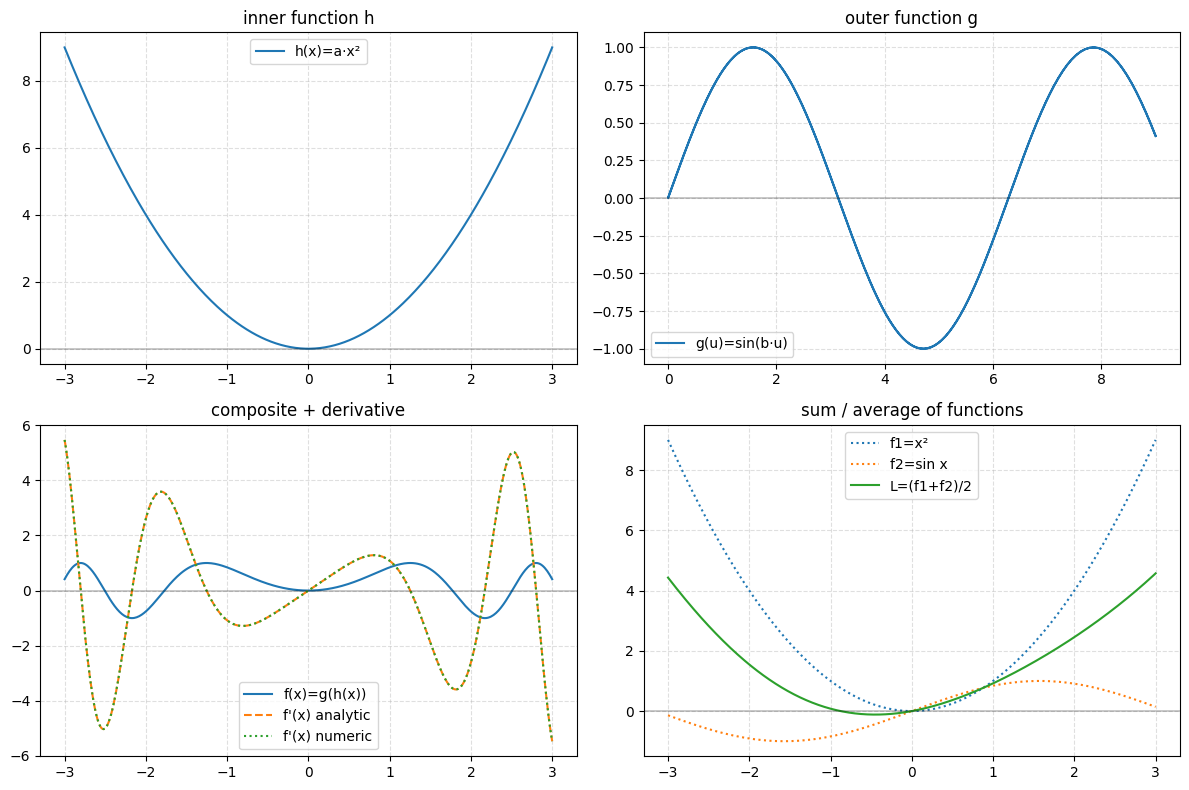

In [ ]:
# Foundations for back‑prop intuition: composition, sums and differentiability  
# You can run this cell as‑is, or tweak the parameters `a` and `b` below
# to see how everything changes.

import numpy as np
import matplotlib.pyplot as plt

# ---------- 1. pick parameters ----------
a = 1.0          # scales the inner (h) function
b = 1.0          # scales the outer (g) function
xmin, xmax = -3, 3
xs = np.linspace(xmin, xmax, 400)

# ---------- 2. define simple building‑block functions ----------
def h(x, a=a):
    """inner function (quadratic)"""
    return a * x**2                     # always differentiable

def g(u, b=b):
    """outer function (sine)"""
    return np.sin(b * u)                # always differentiable

def f(x, a=a, b=b):
    """composite f(x) = g(h(x))"""
    return g(h(x, a), b)

# analytic derivative via chain‑rule:  f'(x) = g'(h(x)) * h'(x)
def dh_dx(x, a=a):
    return 2 * a * x

def dg_du(u, b=b):
    return b * np.cos(b * u)

def df_dx_chain(x, a=a, b=b):
    return dg_du(h(x, a), b) * dh_dx(x, a)

# numeric derivative for sanity check
def df_dx_numeric(x, eps=1e-5):
    return (f(x + eps) - f(x - eps)) / (2 * eps)

# ---------- 3. another pair of functions for “sum / average” ----------
def f1(x):
    return x**2

def f2(x):
    return np.sin(x)

def L(x):
    return 0.5 * (f1(x) + f2(x))        # mean of two losses

# ---------- 4. plotting ----------
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
ax = axes.ravel()

# (a) h(x) and g(u)
ax[0].plot(xs, h(xs), label='h(x)=a·x²')
ax[0].set_title("inner function h")
ax[0].legend()

u_vals = h(xs)
ax[1].plot(u_vals, g(u_vals), label='g(u)=sin(b·u)')
ax[1].set_title("outer function g")
ax[1].legend()

# (b) composite f and its derivative
ax[2].plot(xs, f(xs), label='f(x)=g(h(x))')
ax[2].plot(xs, df_dx_chain(xs), '--', label="f'(x) analytic")
ax[2].plot(xs, df_dx_numeric(xs), ':', label="f'(x) numeric")
ax[2].set_title("composite + derivative")
ax[2].legend()

# (c) sum / average loss
ax[3].plot(xs, f1(xs), ':', label='f1=x²')
ax[3].plot(xs, f2(xs), ':', label='f2=sin x')
ax[3].plot(xs, L(xs), label='L=(f1+f2)/2')
ax[3].set_title("sum / average of functions")
ax[3].legend()

for a in ax:
    a.axhline(0, color='black', linewidth=0.3)
    a.grid(ls='--', alpha=0.4)

plt.tight_layout()



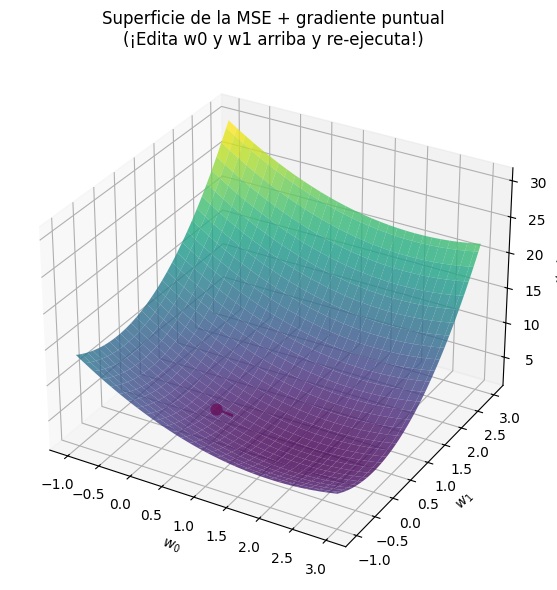

In [ ]:
# %% [markdown]
# ## MSE “bowl” en 3‑D — juega cambiando `w0` y `w1`
#
# 1. **Ajusta** los valores en la sección “AJUSTA AQUÍ”.  
# 2. Ejecuta la celda:  
#    • Verás la superficie de pérdida \(J(w_0,w_1)\).  
#    • Un punto rojo marca tus pesos \((w_0,w_1)\).  
#    • Una flecha muestra la dirección de descenso ( − gradiente).

import numpy as np
import matplotlib.pyplot as plt

# ---------- 1. Datos de juguete ----------
x_data = np.array([-2, -1, 0, 1, 2], dtype=float)
y_data = np.array([ 4,  1, 0, 1, 4], dtype=float)   # y = x²

def mse(w0, w1, x=x_data, y=y_data):
    """
    Calcula J(w0,w1) para un array de w0 y w1 (broadcast seguro).
    """
    # w0, w1 pueden ser mallas 2‑D; agregamos eje nuevo para x
    y_hat = w0[..., None] + w1[..., None] * x
    return np.mean((y - y_hat)**2, axis=-1)

def grad_mse(w0, w1, x=x_data, y=y_data):
    """
    Gradiente analítico de la MSE para modelo lineal y datos 1‑D.
    """
    y_hat = w0 + w1 * x
    error  = y - y_hat
    g0 = -2 * np.mean(error)
    g1 = -2 * np.mean(error * x)
    return g0, g1

# ---------- 2. AJUSTA AQUÍ  ----------
w0 = 0.5   # intercepto
w1 = 0.1   # pendiente
# ------------------------------------

# ---------- malla para la superficie ----------
w0_vals = np.linspace(-1, 3, 60)
w1_vals = np.linspace(-1, 3, 60)
W0, W1   = np.meshgrid(w0_vals, w1_vals)
J        = mse(W0, W1)   # ahora funciona con broadcasting

# ---------- gráfico ----------
fig = plt.figure(figsize=(8, 6))
ax  = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(W0, W1, J, cmap='viridis', alpha=0.8, linewidth=0)

# punto actual y gradiente
j_val = mse(np.array(w0), np.array(w1))  # escalar
g0, g1 = grad_mse(w0, w1)
ax.scatter([w0], [w1], [j_val], color='crimson', s=60, depthshade=True)
ax.quiver(w0, w1, j_val,
          -g0, -g1, 0,
          length=0.3, normalize=True, color='crimson')

ax.set_xlabel('$w_0$')
ax.set_ylabel('$w_1$')
ax.set_zlabel('$J(w)$')
ax.set_title('Superficie de la MSE + gradiente puntual\n(¡Edita w0 y w1 arriba y re‑ejecuta!)')

plt.tight_layout()



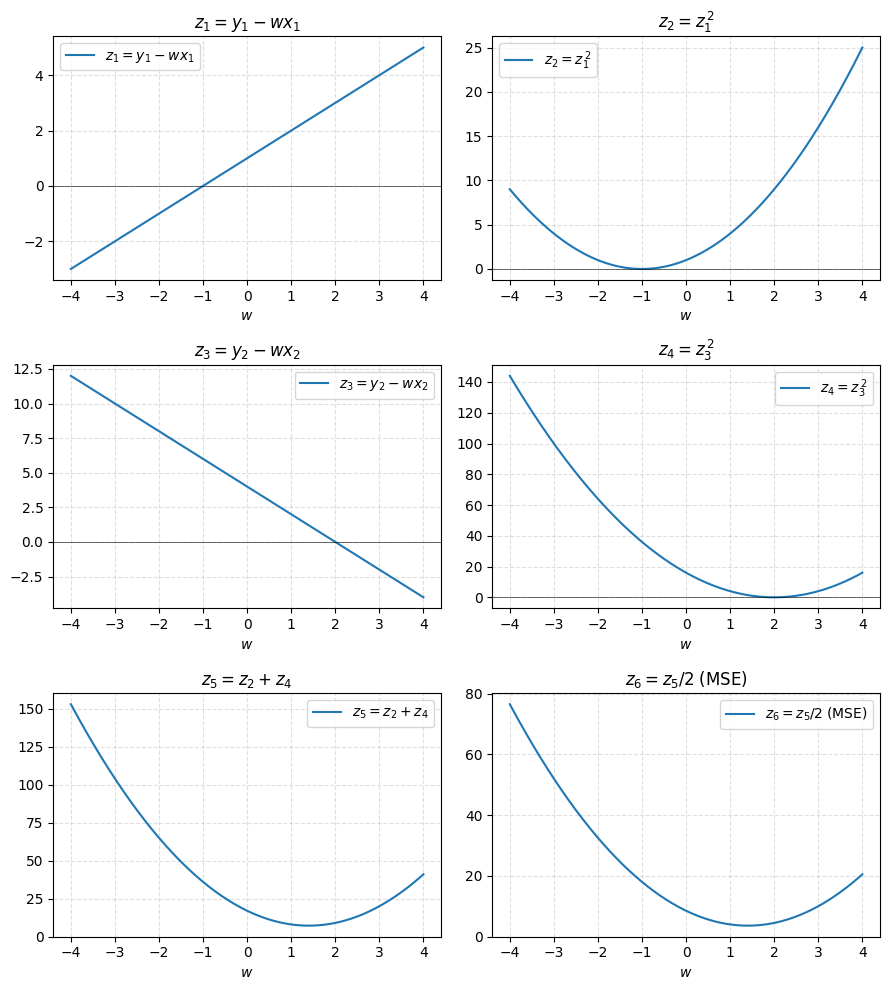

In [ ]:
# %% [markdown]
# # Paso a paso de una MSE con **n = 2** muestras
#
# Fijamos:
# - \(x_1 = -1,\; y_1 = 1\)
# - \(x_2 =  2,\; y_2 = 4\)
#
# Variables intermedias (cómputo hacia adelante):
#
# | Nombre | Expresión |
# |--------|-----------|
# | \(z_1\) | \(y_1 - w\,x_1\)               |
# | \(z_2\) | \(z_1^{\,2}\)                 |
# | \(z_3\) | \(y_2 - w\,x_2\)               |
# | \(z_4\) | \(z_3^{\,2}\)                 |
# | \(z_5\) | \(z_2 + z_4\)                  |
# | \(z_6\) | \(z_5 / n \quad (n=2)\)        |
#
# Veremos **6 gráficas** con cada función vs. `w`
# para tomar intuición de cómo la pérdida final (MSE) se va construyendo.

import numpy as np
import matplotlib.pyplot as plt

# ----- parámetros de los dos datos -----
x1, y1 = -1.0, 1.0
x2, y2 =  2.0, 4.0
n = 2

# rango de pesos
w = np.linspace(-4, 4, 400)

# variables intermedias
z1 = y1 - w * x1          # lineal
z2 = z1**2                # cuadrática
z3 = y2 - w * x2          # lineal
z4 = z3**2                # cuadrática
z5 = z2 + z4              # suma
z6 = z5 / n               # promedio → MSE

# ----- plotting -----
fig, axes = plt.subplots(3, 2, figsize=(9, 10))
ax = axes.ravel()  # flatten for easy indexing

titles = [
    r'$z_1 = y_1 - w x_1$',
    r'$z_2 = z_1^{\,2}$',
    r'$z_3 = y_2 - w x_2$',
    r'$z_4 = z_3^{\,2}$',
    r'$z_5 = z_2 + z_4$',
    r'$z_6 = z_5 / 2\;(\mathrm{MSE})$'
]
series = [z1, z2, z3, z4, z5, z6]

for a, title, s in zip(ax, titles, series):
    a.plot(w, s, label=title)
    a.set_title(title, fontsize=12)
    a.set_xlabel('$w$')
    a.grid(ls='--', alpha=0.4)
    # centre line for visual reference
    a.axhline(0, color='black', linewidth=0.4)
    a.legend()

plt.tight_layout()



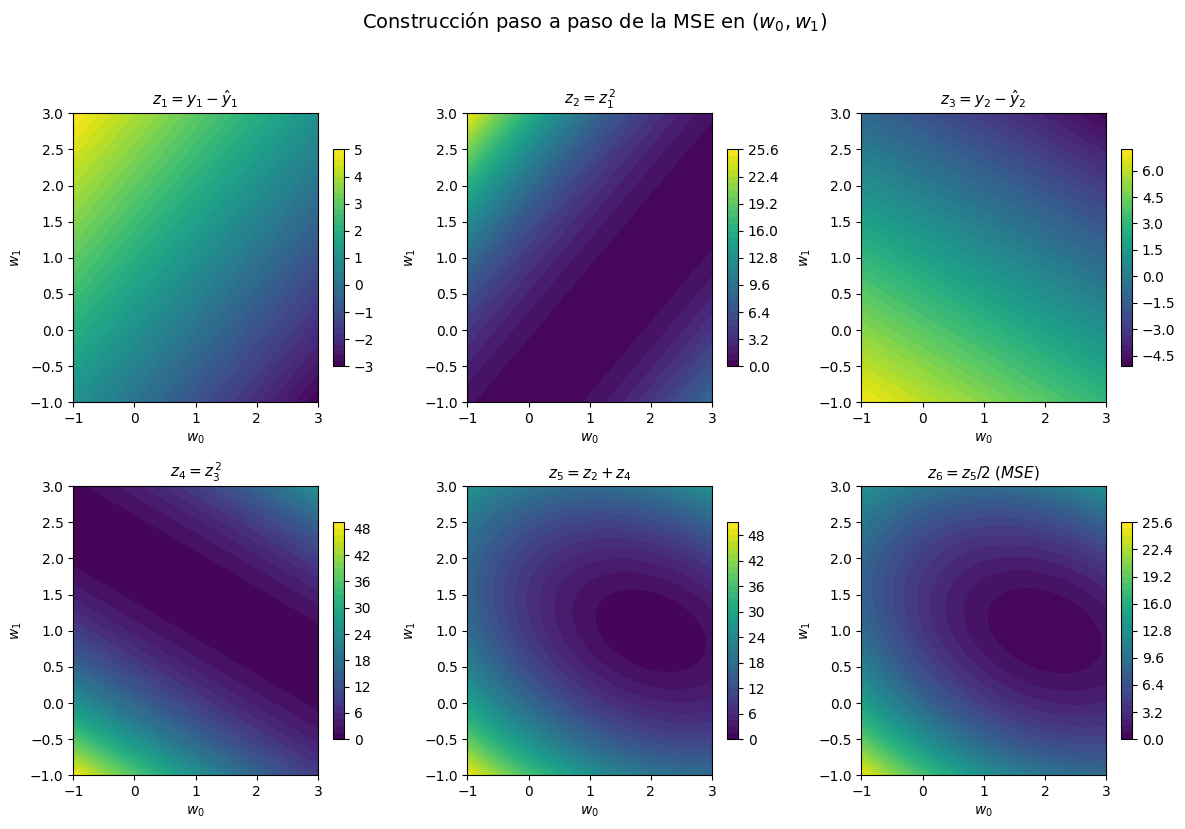

In [ ]:
# %% [markdown]
# # Cadena de funciones con **dos pesos** \(w_0,\;w_1\)  
# _(modelo lineal + MSE para n = 2 ejemplos)_
#
# Definimos
# \[
# \hat y_i = w_0 + w_1 x_i
# \]
# y reproducimos los pasos intermedios
# \[
# \begin{aligned}
# z_1 &= y_1-\hat y_1 &\qquad z_2 &= z_1^2 \\
# z_3 &= y_2-\hat y_2 &\qquad z_4 &= z_3^2 \\
# z_5 &= z_2+z_4 &\qquad z_6 &= \tfrac12 z_5
# \end{aligned}
# \]
# Visualizamos cada \(z_k(w_0,w_1)\) como un **mapa de colores** (contorno),
# para ver cómo se va formando la superficie “bowl” de la MSE.

import numpy as np
import matplotlib.pyplot as plt

# ---------- datos ----------
x1, y1 = -1.0, 1.0
x2, y2 =  2.0, 4.0
n = 2

# ---------- malla de pesos ----------
w0_vals = np.linspace(-1, 3, 200)
w1_vals = np.linspace(-1, 3, 200)
W0, W1  = np.meshgrid(w0_vals, w1_vals)

# ---------- variables intermedias ----------
Z1 = y1 - (W0 + W1 * x1)
Z2 = Z1**2
Z3 = y2 - (W0 + W1 * x2)
Z4 = Z3**2
Z5 = Z2 + Z4
Z6 = Z5 / n   # MSE

names = [
    r'$z_1 = y_1-\hat y_1$',
    r'$z_2 = z_1^{\,2}$',
    r'$z_3 = y_2-\hat y_2$',
    r'$z_4 = z_3^{\,2}$',
    r'$z_5 = z_2+z_4$',
    r'$z_6 = z_5/2\;(MSE)$'
]
fields = [Z1, Z2, Z3, Z4, Z5, Z6]

# ---------- plotting ----------
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.ravel()

for ax, title, field in zip(axes, names, fields):
    c = ax.contourf(W0, W1, field, levels=40, cmap='viridis')
    fig.colorbar(c, ax=ax, shrink=0.75)
    ax.set_title(title, fontsize=11)
    ax.set_xlabel('$w_0$')
    ax.set_ylabel('$w_1$')

plt.suptitle('Construcción paso a paso de la MSE en $(w_0,w_1)$', fontsize=14, y=1.03)
plt.tight_layout()



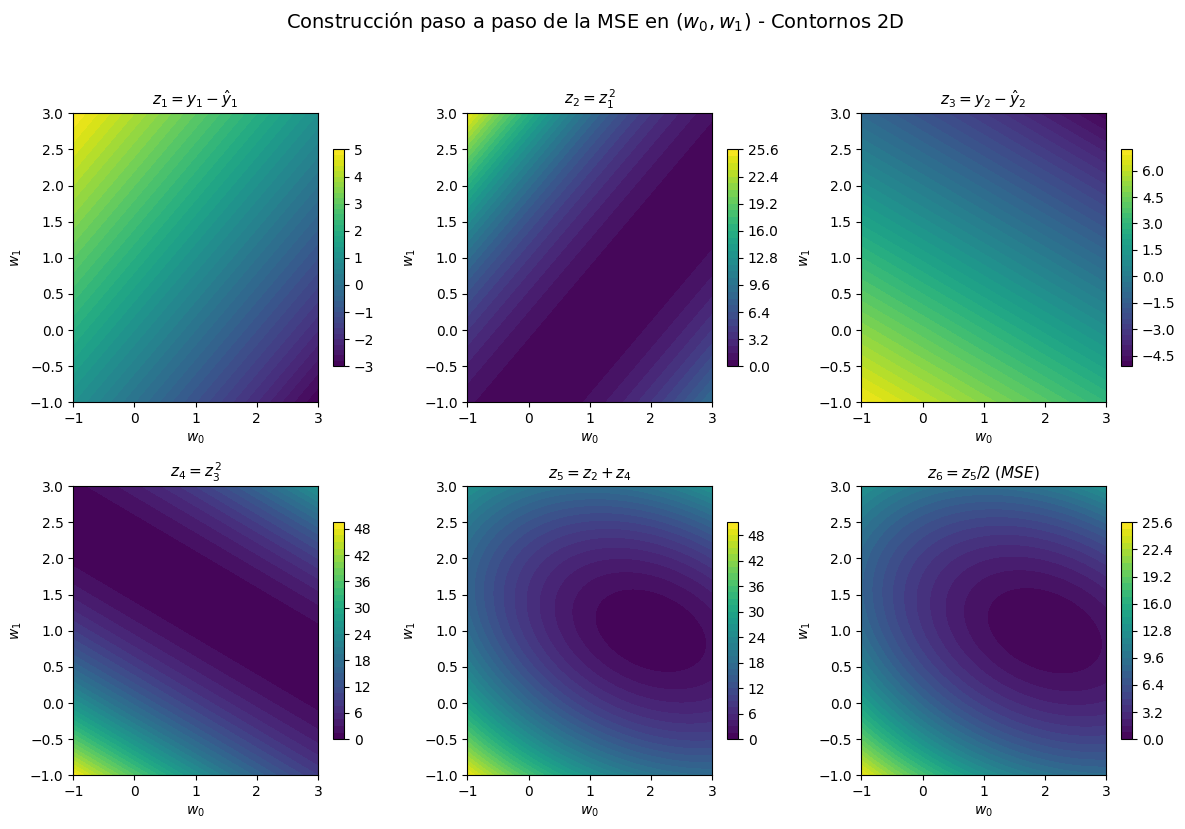

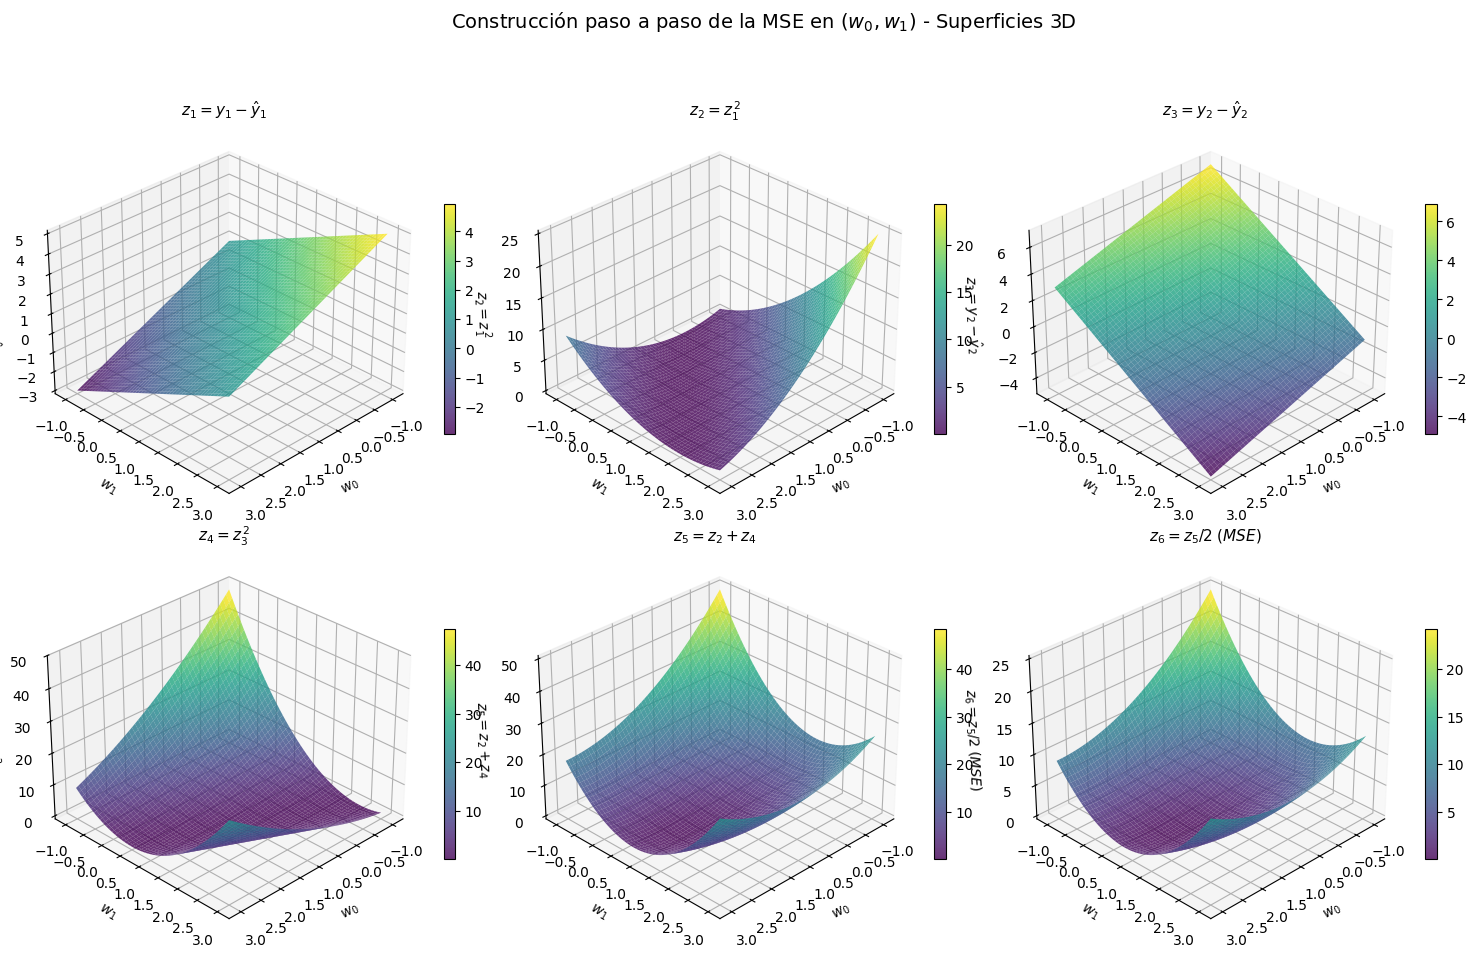

In [ ]:
# %% [markdown]
# # Cadena de funciones con **dos pesos** \(w_0,\;w_1\)  
# _(modelo lineal + MSE para n = 2 ejemplos)_
#
# Definimos
# \[
# \hat y_i = w_0 + w_1 x_i
# \]
# y reproducimos los pasos intermedios
# \[
# \begin{aligned}
# z_1 &= y_1-\hat y_1 &\qquad z_2 &= z_1^2 \\
# z_3 &= y_2-\hat y_2 &\qquad z_4 &= z_3^2 \\
# z_5 &= z_2+z_4 &\qquad z_6 &= \tfrac12 z_5
# \end{aligned}
# \]
# Visualizamos cada \(z_k(w_0,w_1)\) como un **mapa de colores** (contorno) y en 3D,
# para ver mejor cómo se va formando la superficie "bowl" de la MSE.

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# ---------- datos ----------
x1, y1 = -1.0, 1.0
x2, y2 =  2.0, 4.0
n = 2

# ---------- malla de pesos ----------
w0_vals = np.linspace(-1, 3, 200)
w1_vals = np.linspace(-1, 3, 200)
W0, W1  = np.meshgrid(w0_vals, w1_vals)

# ---------- variables intermedias ----------
Z1 = y1 - (W0 + W1 * x1)
Z2 = Z1**2
Z3 = y2 - (W0 + W1 * x2)
Z4 = Z3**2
Z5 = Z2 + Z4
Z6 = Z5 / n   # MSE

names = [
    r'$z_1 = y_1-\hat y_1$',
    r'$z_2 = z_1^{\,2}$',
    r'$z_3 = y_2-\hat y_2$',
    r'$z_4 = z_3^{\,2}$',
    r'$z_5 = z_2+z_4$',
    r'$z_6 = z_5/2\;(MSE)$'
]
fields = [Z1, Z2, Z3, Z4, Z5, Z6]

# ---------- plotting 2D contours ----------
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.ravel()

for ax, title, field in zip(axes, names, fields):
    c = ax.contourf(W0, W1, field, levels=40, cmap='viridis')
    fig.colorbar(c, ax=ax, shrink=0.75)
    ax.set_title(title, fontsize=11)
    ax.set_xlabel('$w_0$')
    ax.set_ylabel('$w_1$')

plt.suptitle('Construcción paso a paso de la MSE en $(w_0,w_1)$ - Contornos 2D', fontsize=14, y=1.03)
plt.tight_layout()

# ---------- plotting 3D surfaces ----------
fig = plt.figure(figsize=(15, 10))
fig.suptitle('Construcción paso a paso de la MSE en $(w_0,w_1)$ - Superficies 3D', fontsize=14, y=0.98)

for i, (title, field) in enumerate(zip(names, fields)):
    ax = fig.add_subplot(2, 3, i+1, projection='3d')
    surf = ax.plot_surface(W0, W1, field, cmap='viridis', alpha=0.8, 
                          linewidth=0, antialiased=True)
    fig.colorbar(surf, ax=ax, shrink=0.5)
    ax.set_title(title, fontsize=11)
    ax.set_xlabel('$w_0$')
    ax.set_ylabel('$w_1$')
    ax.set_zlabel(title)
    # Ajustar ángulo de vista para mejor visualización
    ax.view_init(elev=30, azim=45)

plt.tight_layout()
plt.subplots_adjust(top=0.9)


## MSE con activacion (tanh)

Dataset:
x[0] = -3.000, y[0] = -0.500
x[1] = 4.000, y[1] = -0.000
x[2] = 1.000, y[2] = -2.000


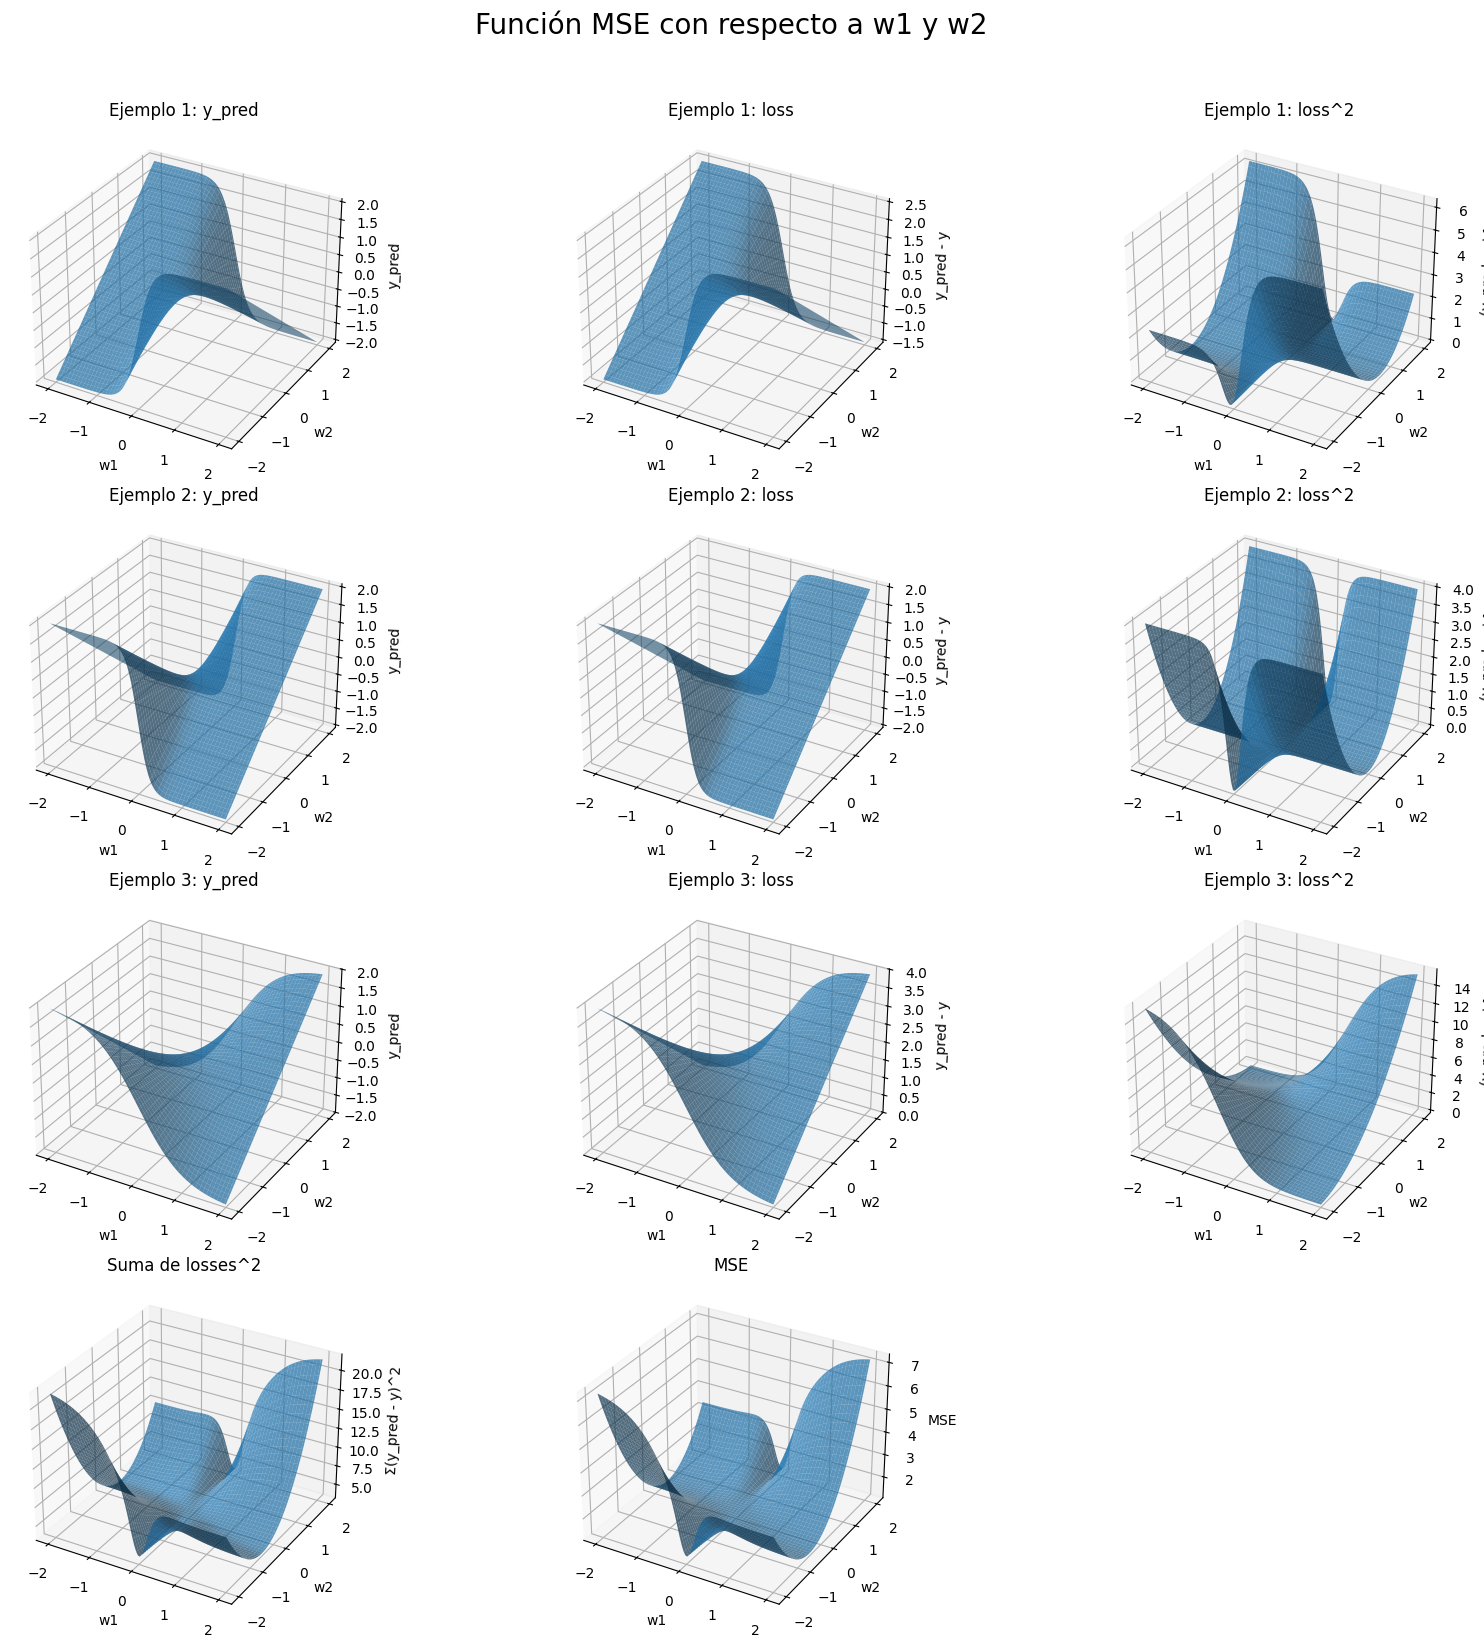

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Datos
x_data = np.array([-3.0, 4.0, 1.0])
y_data = np.array([-0.5, -0.0, -2])

# print the dataset
print("Dataset:")
for i in range(len(x_data)):
    print(f"x[{i}] = {x_data[i]:.3f}, y[{i}] = {y_data[i]:.3f}")

# Rejilla de pesos
w1 = np.linspace(-2, 2, 100)
w2 = np.linspace(-2, 2, 100)
W1, W2 = np.meshgrid(w1, w2)

# Cálculos
pred_list = [np.tanh(W1 * x) * W2 for x in x_data]
loss_list = [pred - y for pred, y in zip(pred_list, y_data)]
sq_loss_list = [loss**2 for loss in loss_list]
sum_sq = sum(sq_loss_list)
mse = sum_sq / len(x_data)

# Configuración de la grilla de plots
fig = plt.figure(figsize=(18, 16))
axs = [[fig.add_subplot(4, 3, i*3 + j + 1, projection='3d') for j in range(3)] for i in range(4)]
plt.suptitle('Función MSE con respecto a w1 y w2', fontsize=20, y=1.02)

# Tres primeras filas: cada ejemplo
for i in range(3):
    # Salida de la red
    axs[i][0].plot_surface(W1, W2, pred_list[i], alpha=0.7)
    axs[i][0].set_title(f'Ejemplo {i+1}: y_pred')
    axs[i][0].set_xlabel('w1'); axs[i][0].set_ylabel('w2'); axs[i][0].set_zlabel('y_pred')

    # Loss individual
    axs[i][1].plot_surface(W1, W2, loss_list[i], alpha=0.7)
    axs[i][1].set_title(f'Ejemplo {i+1}: loss')
    axs[i][1].set_xlabel('w1'); axs[i][1].set_ylabel('w2'); axs[i][1].set_zlabel('y_pred - y')

    # Loss al cuadrado
    axs[i][2].plot_surface(W1, W2, sq_loss_list[i], alpha=0.7)
    axs[i][2].set_title(f'Ejemplo {i+1}: loss^2')
    axs[i][2].set_xlabel('w1'); axs[i][2].set_ylabel('w2'); axs[i][2].set_zlabel('(y_pred - y)^2')

# Última fila: suma de losses cuadradas y MSE
# Suma de squared losses
axs[3][0].plot_surface(W1, W2, sum_sq, alpha=0.7)
axs[3][0].set_title('Suma de losses^2')
axs[3][0].set_xlabel('w1'); axs[3][0].set_ylabel('w2'); axs[3][0].set_zlabel('Σ(y_pred - y)^2')

# MSE
axs[3][1].plot_surface(W1, W2, mse, alpha=0.7)
axs[3][1].set_title('MSE')
axs[3][1].set_xlabel('w1'); axs[3][1].set_ylabel('w2'); axs[3][1].set_zlabel('MSE')

# Subplot vacío
axs[3][2].axis('off')

plt.tight_layout()
plt.show()



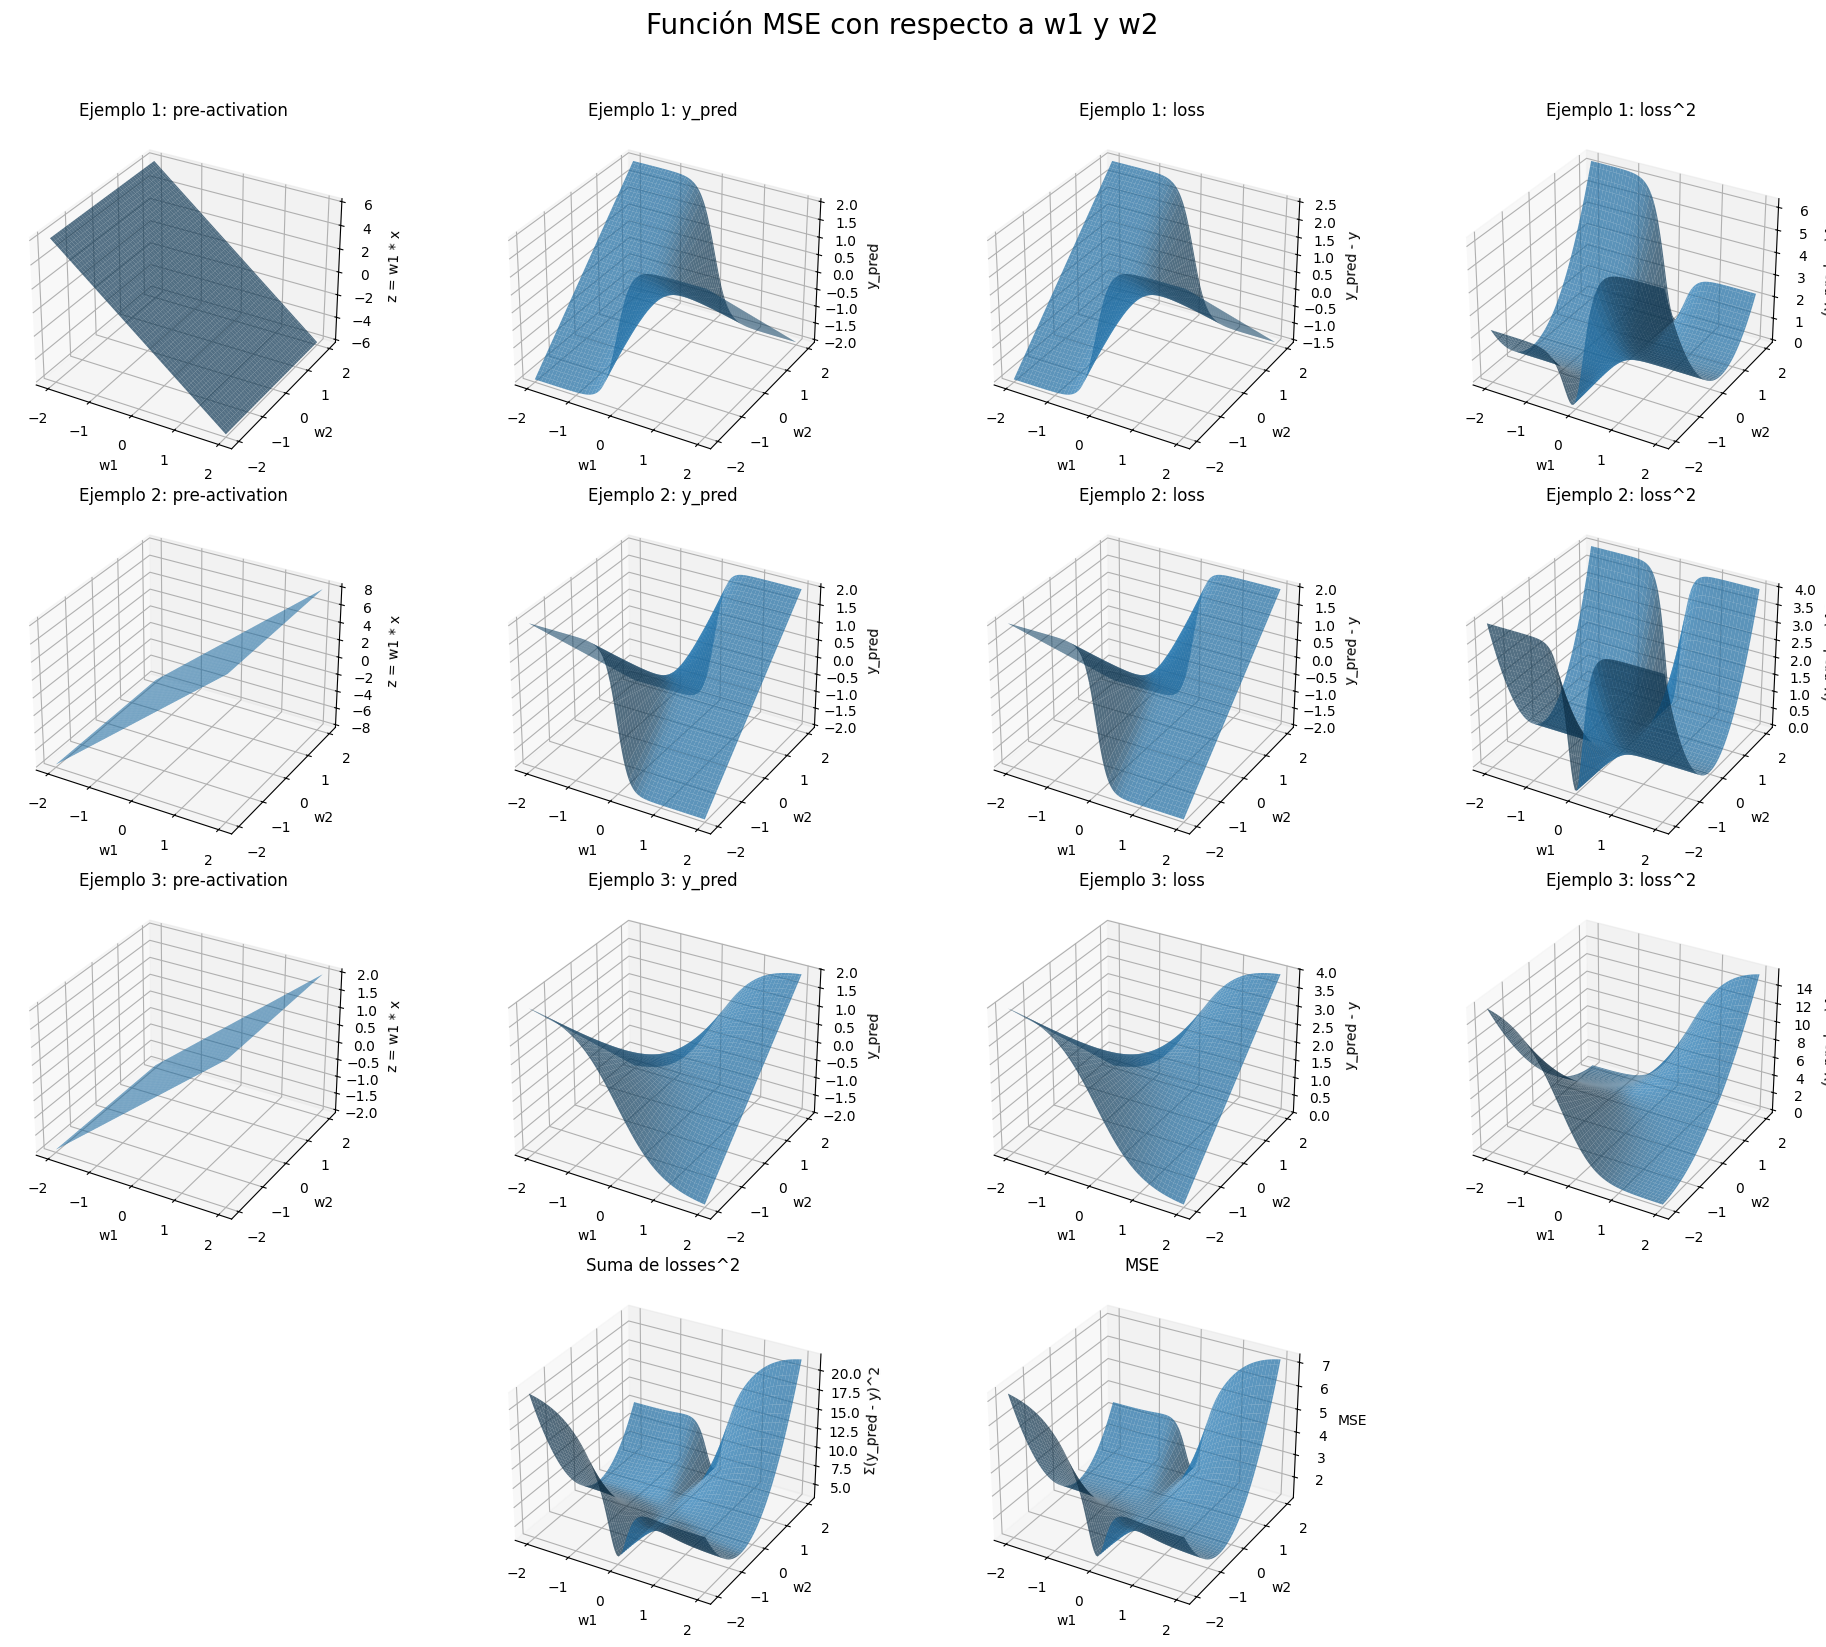

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Datos
x_data = np.array([-3.0, 4.0, 1.0])
y_data = np.array([-0.5, -0.0, -2])

# Rejilla de pesos
w1 = np.linspace(-2, 2, 100)
w2 = np.linspace(-2, 2, 100)
W1, W2 = np.meshgrid(w1, w2)

# Cálculos
pre_act_list = [W1 * x for x in x_data]                      # Pre-activación (antes de tanh)
pred_list = [np.tanh(pre) * W2 for pre in pre_act_list]     # Salida de la red
loss_list = [pred - y for pred, y in zip(pred_list, y_data)]
sq_loss_list = [loss**2 for loss in loss_list]
sum_sq = sum(sq_loss_list)
mse = sum_sq / len(x_data)

# Configuración de la grilla de plots 4x4
fig = plt.figure(figsize=(20, 16))
axs = [[fig.add_subplot(4, 4, i*4 + j + 1, projection='3d') for j in range(4)] for i in range(4)]
plt.suptitle('Función MSE con respecto a w1 y w2', fontsize=20, y=1.02)

# Filas 1-3: Ejemplos 1,2,3
for i in range(3):
    # Columna 0: pre-activación
    axs[i][0].plot_surface(W1, W2, pre_act_list[i], alpha=0.7)
    axs[i][0].set_title(f'Ejemplo {i+1}: pre-activation')
    axs[i][0].set_xlabel('w1'); axs[i][0].set_ylabel('w2'); axs[i][0].set_zlabel('z = w1 * x')

    # Columna 1: salida de la red
    axs[i][1].plot_surface(W1, W2, pred_list[i], alpha=0.7)
    axs[i][1].set_title(f'Ejemplo {i+1}: y_pred')
    axs[i][1].set_xlabel('w1'); axs[i][1].set_ylabel('w2'); axs[i][1].set_zlabel('y_pred')

    # Columna 2: loss individual
    axs[i][2].plot_surface(W1, W2, loss_list[i], alpha=0.7)
    axs[i][2].set_title(f'Ejemplo {i+1}: loss')
    axs[i][2].set_xlabel('w1'); axs[i][2].set_ylabel('w2'); axs[i][2].set_zlabel('y_pred - y')

    # Columna 3: loss al cuadrado
    axs[i][3].plot_surface(W1, W2, sq_loss_list[i], alpha=0.7)
    axs[i][3].set_title(f'Ejemplo {i+1}: loss^2')
    axs[i][3].set_xlabel('w1'); axs[i][3].set_ylabel('w2'); axs[i][3].set_zlabel('(y_pred - y)^2')

# Fila 4: Suma de losses^2 y MSE
# Columna 0 vacía
axs[3][0].axis('off')

# Columna 1: suma de losses^2
axs[3][1].plot_surface(W1, W2, sum_sq, alpha=0.7)
axs[3][1].set_title('Suma de losses^2')
axs[3][1].set_xlabel('w1'); axs[3][1].set_ylabel('w2'); axs[3][1].set_zlabel('Σ(y_pred - y)^2')

# Columna 2: MSE
axs[3][2].plot_surface(W1, W2, mse, alpha=0.7)
axs[3][2].set_title('MSE')
axs[3][2].set_xlabel('w1'); axs[3][2].set_ylabel('w2'); axs[3][2].set_zlabel('MSE')

# Columna 3 vacía
axs[3][3].axis('off')

plt.tight_layout()
plt.show()


# Fundations

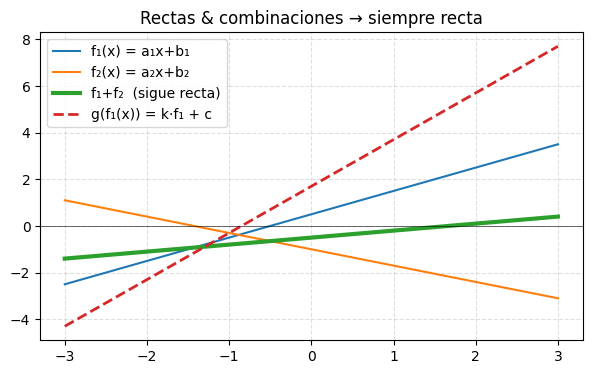

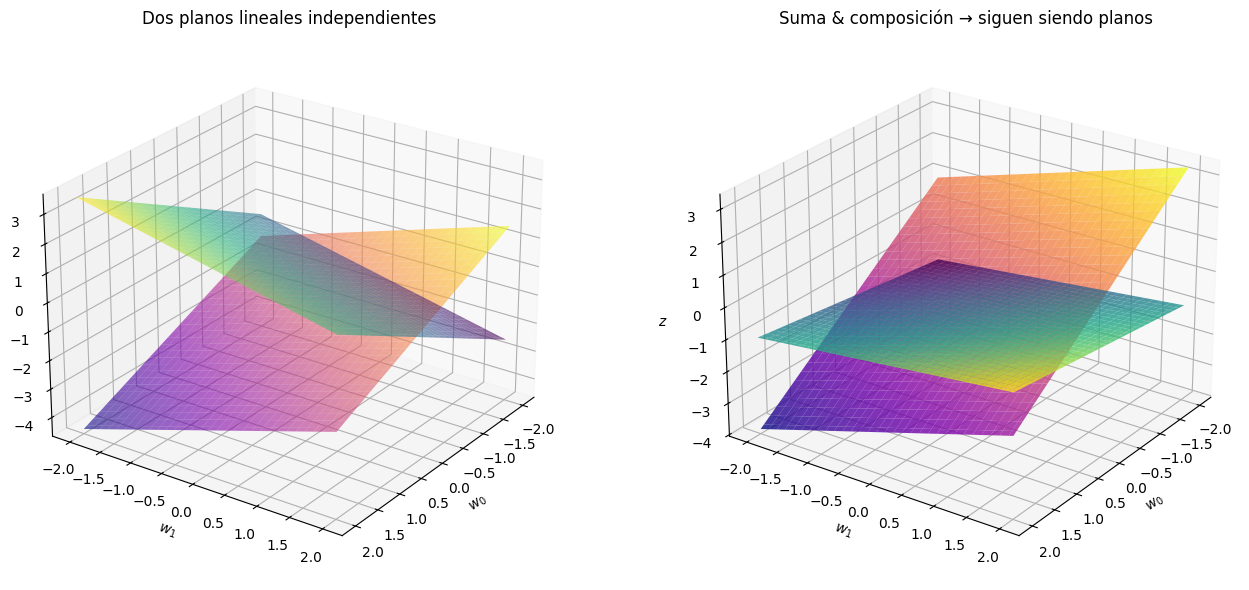

In [ ]:
# %% [markdown]
# # FUNDACIÓN 1 – **Linealidad pura**  
# Queremos “ver” por qué:
# * Suma de lineales ⇒ lineal  
# * Composición de lineales ⇒ lineal  
# * En 2 D (planos) pasa lo mismo
#
# Cambia los parámetros `a,b,c,…` y ejecuta para confirmar que **nunca aparece curvatura**.

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# ---------- 1-D: rectas y sus sumas ---------------------------------
x = np.linspace(-3, 3, 400)

# dos rectas
a1, b1 =  1.0,  0.5    # f1(x) = a1·x + b1
a2, b2 = -0.7, -1.0    # f2(x) = a2·x + b2
f1 = a1 * x + b1
f2 = a2 * x + b2
f_sum = f1 + f2                  # suma
g_comp = 2.0 * f1 + 0.7          # composición lineal: g(x)=k·f1(x)+c

plt.figure(figsize=(7,4))
plt.plot(x, f1,  label='f₁(x) = a₁x+b₁')
plt.plot(x, f2,  label='f₂(x) = a₂x+b₂')
plt.plot(x, f_sum,  lw=3, label='f₁+f₂  (sigue recta)')
plt.plot(x, g_comp, '--', lw=2, label='g(f₁(x)) = k·f₁ + c')
plt.axhline(0, color='black', lw=0.4)
plt.title('Rectas & combinaciones → siempre recta')
plt.legend(); plt.grid(ls='--', alpha=0.4); plt.show();

# ---------- 2-D: planos y sus combinaciones -------------------------
# plano 1:  z = p1*w0 + q1*w1 + r1
# plano 2:  z = p2*w0 + q2*w1 + r2
p1,q1,r1 =  1.0, -0.5,  0.5
p2,q2,r2 = -0.8,  0.7, -1.5

w0_vals = np.linspace(-2, 2, 60)
w1_vals = np.linspace(-2, 2, 60)
W0, W1   = np.meshgrid(w0_vals, w1_vals)
Z1 = p1*W0 + q1*W1 + r1
Z2 = p2*W0 + q2*W1 + r2
Z_sum = Z1 + Z2                # sigue plano
Z_comp = -1.2*Z1 + 0.3         # composición lineal → plano

fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(W0, W1, Z1, cmap='viridis', alpha=0.6)
ax1.plot_surface(W0, W1, Z2, cmap='plasma', alpha=0.6)
ax1.set_title('Dos planos lineales independientes')

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(W0, W1, Z_sum, cmap='viridis', alpha=0.8)
ax2.plot_surface(W0, W1, Z_comp, cmap='plasma', alpha=0.8)
ax2.set_title('Suma & composición → siguen siendo planos')

for ax in (ax1, ax2):
    ax.set_xlabel('$w_0$'); ax.set_ylabel('$w_1$'); ax.set_zlabel('$z$')
    ax.view_init(elev=25, azim=35)

plt.tight_layout();


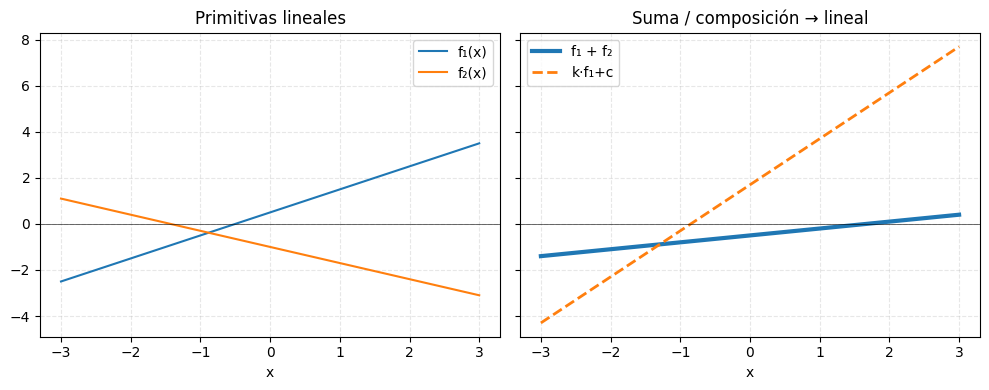

In [ ]:
# ----- 1-D: rectas -----
x = np.linspace(-3, 3, 400)
a1, b1 =  1.0,  0.5    # f1(x)
a2, b2 = -0.7, -1.0    # f2(x)

f1 = a1 * x + b1
f2 = a2 * x + b2
f_sum  = f1 + f2                 # suma
g_comp = 2.0 * f1 + 0.7          # composición lineal

fig, (axL, axR) = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

# --- primitivas ---
axL.plot(x, f1, label='f₁(x)')
axL.plot(x, f2, label='f₂(x)')
axL.set_title('Primitivas lineales')
axL.grid(ls='--', alpha=0.3)
axL.legend()

# --- resultados (combinaciones) ---
axR.plot(x, f_sum,  lw=3, label='f₁ + f₂')
axR.plot(x, g_comp, '--', lw=2, label='k·f₁+c')
axR.set_title('Suma / composición → lineal')
axR.grid(ls='--', alpha=0.3)
axR.legend()

for ax in (axL, axR):
    ax.set_xlabel('x')
    ax.axhline(0, color='black', lw=0.4)

plt.tight_layout()


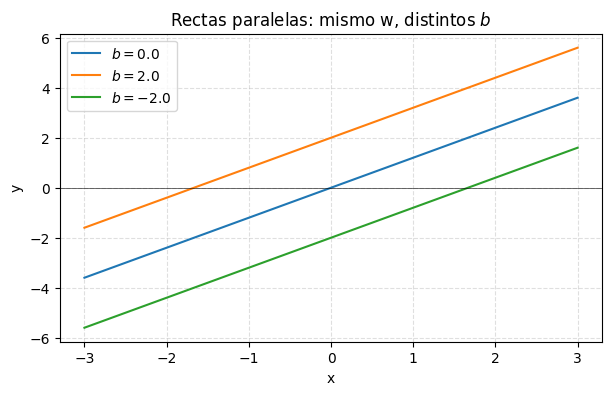

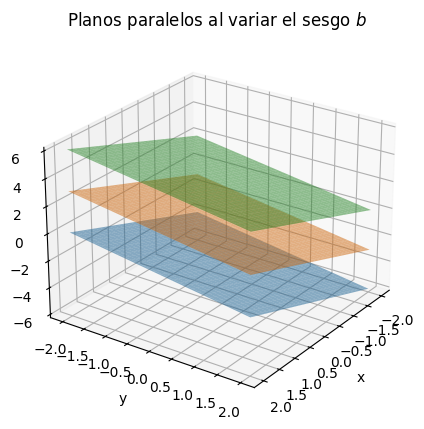

In [ ]:
# %% [markdown]
# # Linealidad + sesgo ⇒ misma forma, otro lugar
#
# *1-D*:   y = w·x        (pasa por el origen)  
#          y = w·x + b    (misma pendiente, distinto corte)  
# *2-D*:   z = w0 + w1·x + w2·y  (planos paralelos al variar w0)

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# ---------- 1-D ----------
x = np.linspace(-3, 3, 400)
w = 1.2
b_vals = [0.0,  2.0, -2.0]

plt.figure(figsize=(7,4))
for b in b_vals:
    plt.plot(x, w*x + b, label=f'$b={b}$')
plt.title('Rectas paralelas: mismo w, distintos $b$')
plt.xlabel('x'); plt.ylabel('y'); plt.grid(ls='--', alpha=0.4)
plt.axhline(0,color='k',lw=0.4); plt.legend(); plt.show()

# ---------- 2-D ----------
xv = np.linspace(-2, 2, 60)
yv = np.linspace(-2, 2, 60)
X, Y = np.meshgrid(xv, yv)
w1, w2 = 1.0, -0.5
b_vals3D = [-3, 0, 3]

fig = plt.figure(figsize=(14,5))
ax = fig.add_subplot(111, projection='3d')
for b in b_vals3D:
    Z = b + w1*X + w2*Y
    ax.plot_surface(X, Y, Z, alpha=0.5)
ax.set_title('Planos paralelos al variar el sesgo $b$')
ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('z')
ax.view_init(elev=25, azim=35)


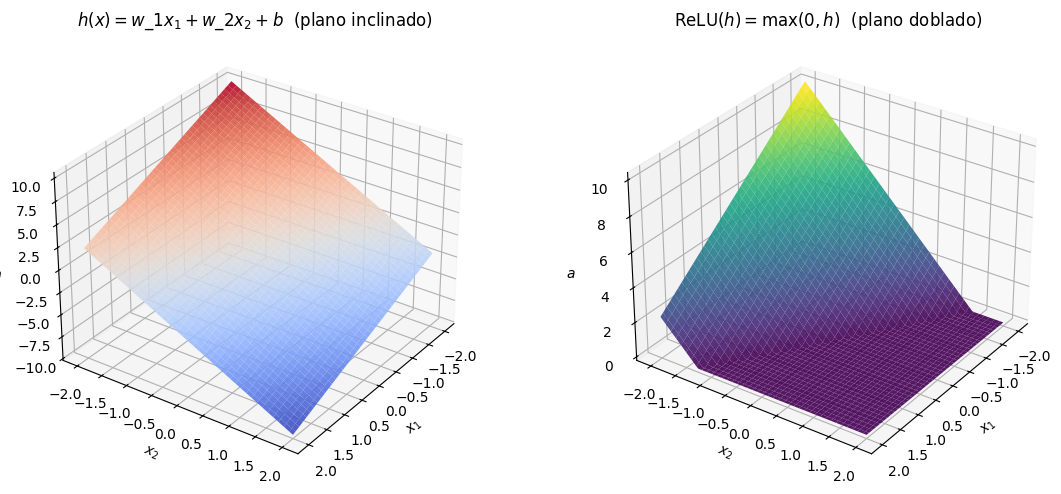

In [ ]:
# %% [markdown]
# ## ReLU en 3-D: antes vs. después — vista limpia
#
# * Una sola neurona lineal `h = W·x + b` (doble entrada).  
# * Después le aplicamos **ReLU** \(a = \max(0,h)\).  
# * Dibujamos **dos** superficies en 3-D, lado a lado, con la misma perspectiva
#   para que el “doblez” se aprecie al instante.

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# ---------- plano de entrada ----------
grid = np.linspace(-2, 2, 120)
X1, X2 = np.meshgrid(grid, grid)

# ---------- parámetros de la capa lineal ----------
W = np.array([-2.0, -3.0])   # pesos
b = 0.2                   # sesgo

H = W[0]*X1 + W[1]*X2 + b       # pre-activación
A = np.maximum(0, H)            # ReLU

# ---------- plotting ----------
fig = plt.figure(figsize=(12,5))

# (A) Superficie lineal h(x)
ax1 = fig.add_subplot(121, projection='3d')
surf1 = ax1.plot_surface(X1, X2, H,
                         cmap='coolwarm', alpha=0.9, linewidth=0)
ax1.set_title('$h(x)=w\\_1x_1 + w\\_2x_2 + b$  (plano inclinado)')
ax1.set_xlabel('$x_1$'); ax1.set_ylabel('$x_2$'); ax1.set_zlabel('$h$')
ax1.view_init(elev=30, azim=35)

# (B) Después de ReLU
ax2 = fig.add_subplot(122, projection='3d')
surf2 = ax2.plot_surface(X1, X2, A,
                         cmap='viridis', alpha=0.9, linewidth=0)
ax2.set_title('$\\text{ReLU}(h)=\\max(0,h)$  (plano doblado)')
ax2.set_xlabel('$x_1$'); ax2.set_ylabel('$x_2$'); ax2.set_zlabel('$a$')
ax2.view_init(elev=30, azim=35)

plt.tight_layout()


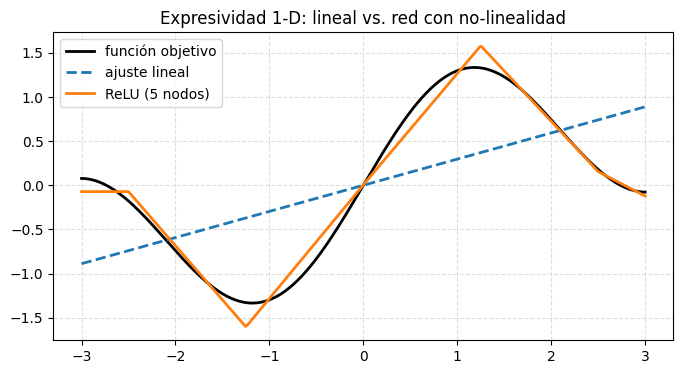

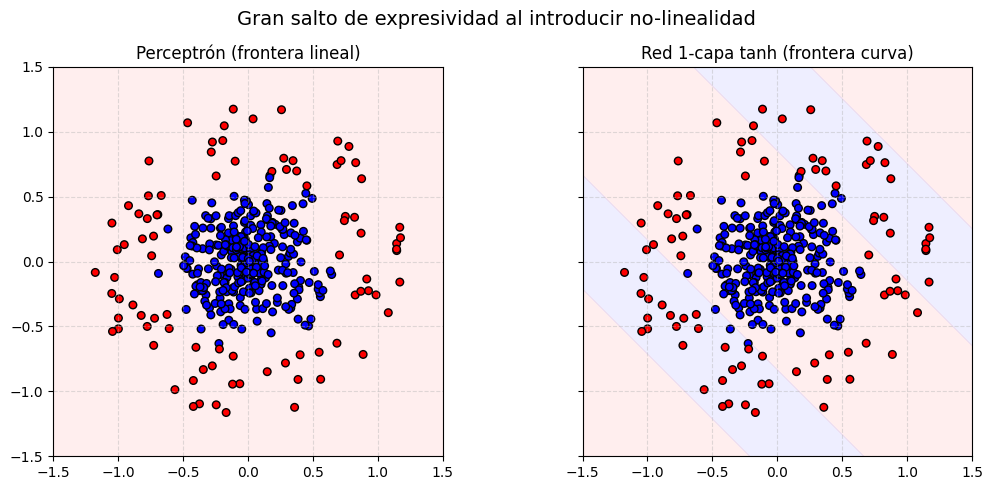

In [ ]:
# %% [markdown]
# # Lineal vs. “lineal + no-linealidad”  
# Demostramos gráficamente la **enorme diferencia de expresividad**:
#
# * **Parte A (1-D)**  
#   - Objetivo: función ondulada  f(x) = sin(1.5 x) + 0.3 x  
#   - Ajuste 1 → **Regresión lineal**   y ≈ a·x+b  
#   - Ajuste 2 → **Red 1-capa “ReLU”**  
#       hᵢ(x)=ReLU(x−cᵢ)  (cinco nodos) → y ≈ Σ wᵢ·hᵢ + w₀
#
# * **Parte B (2-D)**  
#   - Datos: anillo vs centro  (problema inseparable linealmente)  
#   - Clasificador 1 → **Perceptrón** (frontera lineal)  
#   - Clasificador 2 → **Pequeña red**  (8 tanh ocultas)  
#     ⇒ frontera “curvada” que rodea el anillo
#
# No se usan librerías externas; todo con NumPy + Matplotlib.
# ---------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D   # sólo se necesita para la parte B

# ══════════════════════════════
# Parte A ─ Aproximación 1-D
# ══════════════════════════════
np.random.seed(0)
x = np.linspace(-3, 3, 400)
f_true = np.sin(1.5*x) + 0.3*x          # función objetivo («complicada»)

# ---------- ajuste lineal ----------
A_lin = np.vstack([x, np.ones_like(x)]).T
w_lin, b_lin = np.linalg.lstsq(A_lin, f_true, rcond=None)[0]
y_lin = w_lin * x + b_lin

# ---------- “red” 1-capa ReLU (5 nodos) ----------
centers = np.linspace(-2.5, 2.5, 5)
H = np.maximum(0, x[:,None] - centers[None,:])   # matrix Nx5
H_aug = np.hstack([H, np.ones((x.shape[0],1))])  # + bias column
w_relu = np.linalg.lstsq(H_aug, f_true, rcond=None)[0]  # pesos óptimos LS
y_relu = H_aug @ w_relu

# ---------- ploteo ----------
plt.figure(figsize=(8,4))
plt.plot(x, f_true,  'k', lw=2, label='función objetivo')
plt.plot(x, y_lin,   '--',  lw=2, label='ajuste lineal')
plt.plot(x, y_relu,  '-',   lw=2, label='ReLU (5 nodos)')
plt.legend(); plt.grid(ls='--', alpha=0.4)
plt.title('Expresividad 1-D: lineal vs. red con no-linealidad'); plt.show();


# ══════════════════════════════
# Parte B ─ Clasificación 2-D
# ══════════════════════════════
# ---------- generar datos ----------
n_samples = 400
r_inner = 0.5; r_outer = 1.2
angles = 2*np.pi*np.random.rand(n_samples)
radii  = np.where(np.random.rand(n_samples) < 0.5,
                  r_inner*np.random.rand(n_samples),
                  r_outer*np.random.rand(n_samples))
X = np.c_[radii*np.cos(angles), radii*np.sin(angles)]
y = (radii > 0.7).astype(int)           # 0 = centro, 1 = anillo

# ---------- perceptrón (regresión logística simplificada) ----------
X_aug = np.hstack([X, np.ones((n_samples,1))])
w_perc = np.linalg.pinv(X_aug) @ (2*y-1)     # pseudo-inversa → separador lineal
grid = np.linspace(-1.5, 1.5, 200)
GX, GY = np.meshgrid(grid, grid)
G_aug = np.c_[GX.ravel(), GY.ravel(), np.ones(GX.size)]
Z_lin  = (G_aug @ w_perc).reshape(GX.shape)

# ---------- mini-red: capa oculta tanh (8 nodos, centros fijos) ----------
centers2 = np.array([[ 1.2,  0.0],
                     [-1.2,  0.0],
                     [ 0.0,  1.2],
                     [ 0.0, -1.2],
                     [ 0.8,  0.8],
                     [ 0.8, -0.8],
                     [-0.8,  0.8],
                     [-0.8, -0.8]])
scale = 2.0

# --- activaciones ocultas para los datos ---
diff      = X[:,None,:] - centers2[None,:,:]       # (N,8,2)
H2        = np.tanh( scale * diff.sum(-1) )        # (N,8) -> escalar por nodo
H2aug     = np.hstack([H2, np.ones((n_samples,1))])
w2        = np.linalg.pinv(H2aug) @ (2*y-1)        # pesos (9,)

# --- activaciones ocultas para la rejilla ---
diff_g    = np.stack([GX,GY],2)[:,:,None,:] - centers2[None,None,:,:]  # (M,M,8,2)
H2g       = np.tanh( scale * diff_g.sum(-1) )                          # (M,M,8)
H2gaug    = np.concatenate([H2g, np.ones(GX.shape+(1,))], axis=2)     # (M,M,9)
Z_non     = (H2gaug @ w2).squeeze()                                    # (M,M)

# ---------- plots ----------
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(11,5), sharex=True, sharey=True)
ax1.contourf(GX, GY, Z_lin>0, levels=1, alpha=0.2, colors=['#FFAAAA','#AAAAFF'])
ax1.scatter(X[:,0], X[:,1], c=y, cmap='bwr', s=30, edgecolors='k')
ax1.set_title('Perceptrón (frontera lineal)')

ax2.contourf(GX, GY, Z_non>0, levels=1, alpha=0.2, colors=['#FFAAAA','#AAAAFF'])
ax2.scatter(X[:,0], X[:,1], c=y, cmap='bwr', s=30, edgecolors='k')
ax2.set_title('Red 1-capa tanh (frontera curva)')

for ax in (ax1, ax2):
    ax.set_xlim(-1.5,1.5); ax.set_ylim(-1.5,1.5)
    ax.set_aspect('equal'); ax.grid(ls='--', alpha=0.4)

plt.suptitle('Gran salto de expresividad al introducir no-linealidad', y=0.97, fontsize=14)
plt.tight_layout();


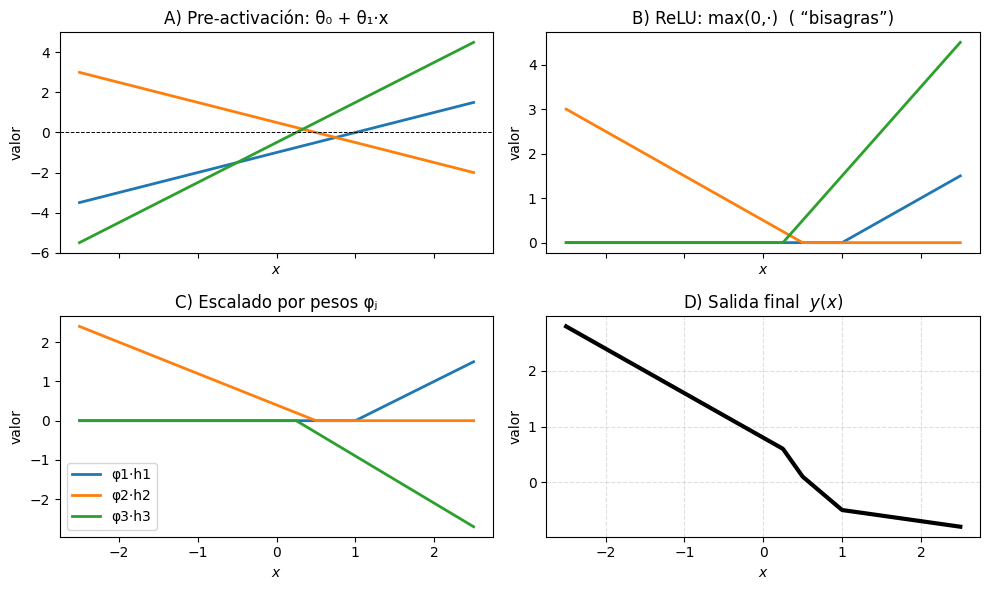

In [ ]:
# %% [markdown]
# ## Shallow-Net 1D — visualización paso a paso
#
# y = φ₀ + Σⱼ φⱼ · ReLU( θⱼ0 + θⱼ1 · x )
#
# *   Panel A – Las tres rectas lineales (pre-activación)  
# *   Panel B – Las rectas tras pasar por **ReLU** (clip <0)  
# *   Panel C – Cada recta ReLU escalada por φⱼ  
# *   Panel D – Suma final + sesgo φ₀  ⇒ función a trozos  
#
# Juega con los θ, φ y mira cómo cambia todo.

import numpy as np
import matplotlib.pyplot as plt

# ───────── Parámetros de la red ──────────
n_hidden = 3                                  # nº de unidades ocultas
theta    = np.array([[-1.0,  1.0],            # [θ10, θ11]
                     [ 0.5, -1.0],            # [θ20, θ21]
                     [-0.5,  2.0]])[:n_hidden]
phi      = np.array([ 0.4,  1.0,  0.8, -0.6])[:n_hidden+1]   # [φ0, φ1, φ2, φ3]

# ───────── Dominio de entrada ────────────
x = np.linspace(-2.5, 2.5, 400)

# ───────── Cálculos paso a paso ───────────
h_lin   = theta[:,0,None] + theta[:,1,None] * x      # (n_hidden, N)
h_relu  = np.maximum(0, h_lin)
h_scaled= phi[1:,None] * h_relu
y_final = phi[0] + h_scaled.sum(axis=0)

# ───────── Plotting ───────────────────────
fig, axes = plt.subplots(2, 2, figsize=(10,6), sharex=True)
axes = axes.ravel()
colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple']

# Panel A – rectas originales
for j in range(n_hidden):
    axes[0].plot(x, h_lin[j], color=colors[j], lw=2)
axes[0].set_title('A) Pre-activación: θ₀ + θ₁·x')
axes[0].axhline(0, color='k', ls='--', lw=0.7)

# Panel B – ReLU aplicada
for j in range(n_hidden):
    axes[1].plot(x, h_relu[j], color=colors[j], lw=2)
axes[1].set_title('B) ReLU: max(0,·)  ( “bisagras”)')

# Panel C – cada ReLU escalada por φⱼ
for j in range(n_hidden):
    axes[2].plot(x, h_scaled[j], color=colors[j], lw=2,
                 label=fr'φ{j+1}·h{j+1}')
axes[2].set_title('C) Escalado por pesos φⱼ'); axes[2].legend()

# Panel D – suma final + sesgo φ₀
axes[3].plot(x, y_final, color='k', lw=3)
axes[3].set_title('D) Salida final  $y(x)$'); axes[3].grid(ls='--', alpha=0.4)

for ax in axes: ax.set_ylabel('valor'); ax.set_xlabel('$x$')
plt.tight_layout(); plt.show()


### ¿Por qué la red con $n$ ReLU genera, **como máximo**, $n+1$ tramos lineales?

Imagina la salida de la red en 1-D como una **suma de rampas**:

$$
y(x)\;=\;\phi_0\;+\;\sum_{j=1}^{n} \phi_j\,\underbrace{\max\!\left(0,\;\theta_{j0}+\theta_{j1}x\right)}_{\text{“rampa” }j}
$$

1. **Cada ReLU es una “rampa con bisagra”**

   * Antes de su punto de corte $x_j^{\star}=-\tfrac{\theta_{j0}}{\theta_{j1}}$ vale **0** (pendiente cero).
   * Después del corte, crece linealmente con **pendiente** $\theta_{j1}$.

2. **Superposición de rampas**

   * Sumas todas las rampas escaladas por sus pesos $\phi_j$.
   * El resultado sigue siendo **lineal** mientras el conjunto de rampas activas (las que ya se abrieron) **no cambie**.

3. **Dónde puede cambiar la pendiente?**

   * **Solo** en los puntos $x_j^{\star}$ donde *alguna* rampa pasa de “apagada” a “encendida”.
   * Ordena esos cortes de menor a mayor: $x_{(1)}^{\star} < x_{(2)}^{\star} < \dots < x_{(k)}^{\star}$ (si dos cortes coinciden cuentan como uno).

4. **Número de regiones**

   * Entre $-\infty$ y el primer corte: 1ª región lineal.
   * Entre cada par de cortes sucesivos: regiones 2, 3, …, $k$.
   * Después del último corte hasta $+\infty$: región $k+1$.

   ⇒ **Máximo** $k = n$ cortes ⇒ **máximo** $n+1$ tramos.

5. **Pendiente en cada tramo**

   * En un tramo está activa la misma “bolsa” de rampas; la salida es

     $$
       y(x)=\phi_0+\bigl(\!\sum_{j\in\text{activos}}\phi_j\theta_{j1}\bigr)\,x + \text{constante}
     $$
   * Cambias de tramo ⇢ se enciende otra rampa ⇢ añades $\phi_j\theta_{j1}$ a la pendiente ⇢ la recta “gira”.

---

#### Ejemplo con $n=3$ (el del notebook)

| Tramo | Rangos de $x$                       | Rampas activas    | Pendiente del tramo                                     |
| ----- | ----------------------------------- | ----------------- | ------------------------------------------------------- |
| 1     | $x<x_{(1)}^{\star}$                 | – (ninguna)       | $0$                                                     |
| 2     | $x_{(1)}^{\star}<x<x_{(2)}^{\star}$ | $h_1$             | $\phi_1\theta_{11}$                                     |
| 3     | $x_{(2)}^{\star}<x<x_{(3)}^{\star}$ | $h_1,\,h_2$       | $\phi_1\theta_{11}+\phi_2\theta_{21}$                   |
| 4     | $x>x_{(3)}^{\star}$                 | $h_1,\,h_2,\,h_3$ | $\phi_1\theta_{11}+\phi_2\theta_{21}+\phi_3\theta_{31}$ |

*Si dos cortes coincidieran o alguna rampa estuviera siempre apagada, habría menos de 4 tramos.*

---

#### Intuición final

* **Lineal + lineal + … = lineal:** apilar rectas sin bisagra no añade expresividad.
* **Cada ReLU añade UNA bisagra:** por eso la capacidad crece con $n$.
* Con suficientes rampas y pesos adecuados, las piezas lineales pueden aproximar **cualquier** curva continua (teorema de aproximación universal).


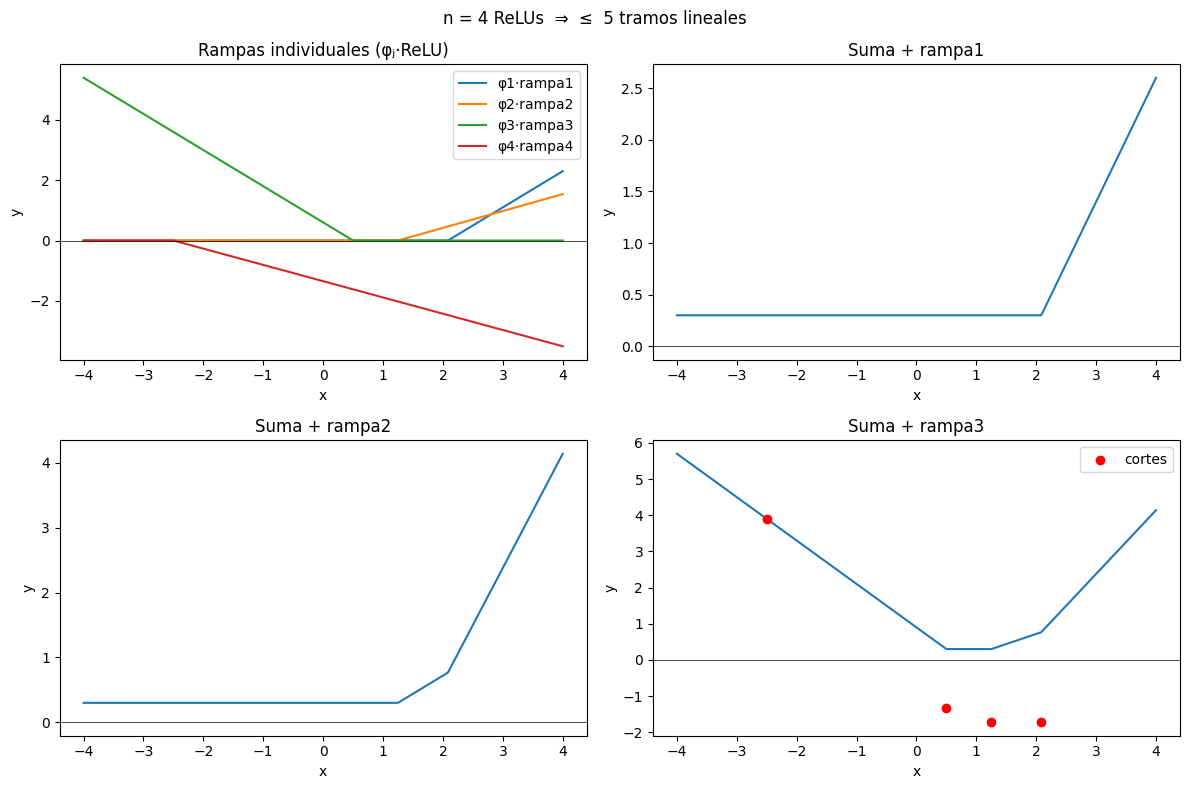

In [1]:
# %% [markdown]
# ## 1-D “n ReLUs → (n + 1) tramos” — demo
#
#   y(x) = φ₀ + Σⱼ φⱼ · ReLU( θⱼ₀ + θⱼ₁·x )
#
# * Cambia `n` y los parámetros para experimentar.
# * El script dibuja:
#     A) cada rampa individual  
#     B) la construcción paso a paso de la suma  
#     C) el resultado final con los cortes resaltados.

import numpy as np
import matplotlib.pyplot as plt

# ---------- ajustes -------------------------------
n        = 4                              # nº de ReLUs
theta_0  = np.array([-2.5, -1.0,  0.5, 1.5])[:n]   # desplazamientos
theta_1  = np.array([ 1.2,  0.8, -1.0, 0.6])[:n]   # pendientes internas
phi      = np.array([ 1.0,  0.7,  1.2, -0.9])[:n]  # pesos de salida
phi0     = 0.3                              # sesgo final
# dominio
x = np.linspace(-4, 4, 800)

# ---------- rampas individuales -------------------
ramps = []
cuts  = []
for t0,t1 in zip(theta_0, theta_1):
    z      = t0 + t1*x           # plano 1-D
    rampa  = np.maximum(z, 0.0)  # ReLU
    ramps.append(rampa)
    cuts.append(-t0/t1)          # bisagra (donde z = 0)

# ---------- suma progresiva -----------------------
partials = []
running  = phi0 * np.ones_like(x)
for w, r in zip(phi, ramps):
    running = running + w*r
    partials.append(running.copy())

y = running           # salida final
cuts = np.sort(cuts)  # puntos de cambio

# ---------- plot ----------------------------------
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()

# A) rampas
for j,r in enumerate(ramps,1):
    axes[0].plot(x, phi[j-1]*r, label=f'φ{j}·rampa{j}')
axes[0].set_title('Rampas individuales (φⱼ·ReLU)')
axes[0].legend()

# B-C-D) construcción paso a paso
titles = ['+ rampa1', '+ rampa2', '+ rampa3', '+ rampa4'][:n]
for ax, part, tit in zip(axes[1:], partials, titles):
    ax.plot(x, part); ax.set_title(f'Suma {tit}')

# cortes & tramos en figura final
axes[-1].scatter(cuts, np.interp(cuts, x, y), c='red', zorder=5, label='cortes')
axes[-1].legend()

for ax in axes:
    ax.axhline(0, color='k', lw=.5)
    ax.set_xlabel('x'); ax.set_ylabel('y')

fig.suptitle(f'n = {n} ReLUs  ⇒  ≤  {n+1} tramos lineales')
plt.tight_layout()
plt.show()


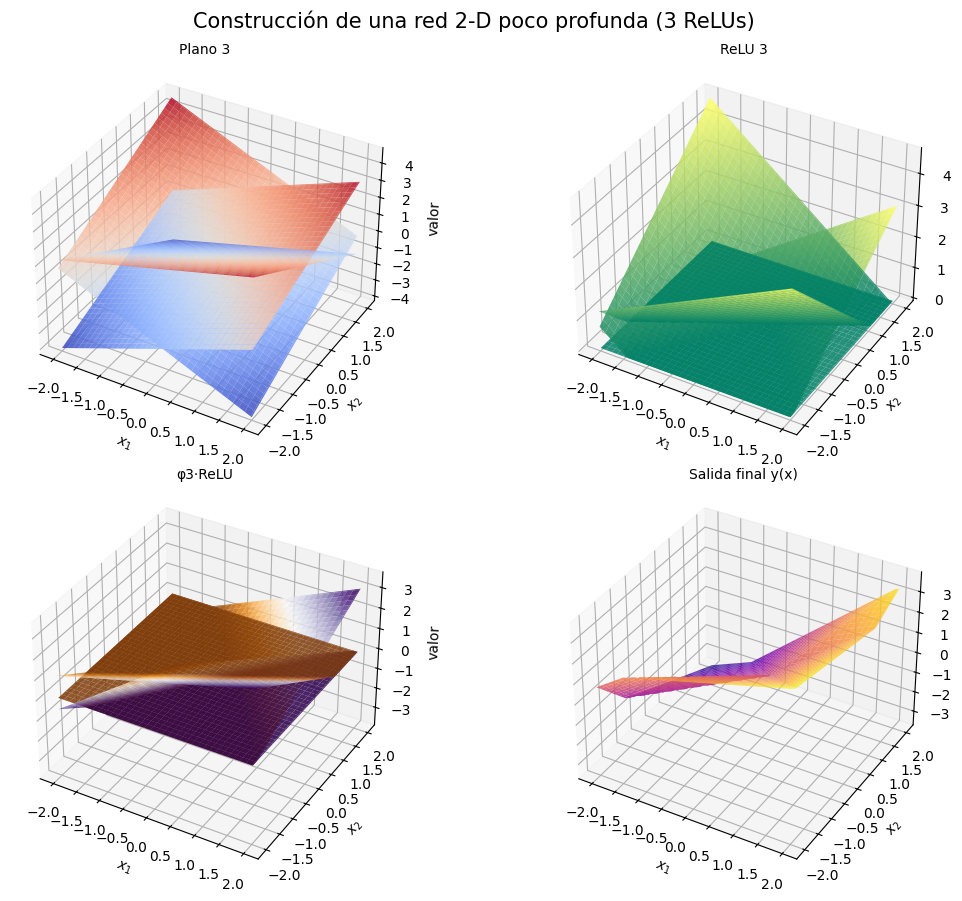

In [ ]:
# %% [markdown]
# # Red 2-D, 3 ReLUs – visualización por etapas
#
# h_j(x) = ReLU(θ_j0 + θ_j1 x1 + θ_j2 x2)
# y(x)   = φ0 + Σ φ_j · h_j(x)
#
# Mostramos:
#  A) Planos antes de ReLU
#  B) Planos tras ReLU (techo convexo)
#  C) Tejados escalados por φ
#  D) Superficie final y(x)

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# ─── Parámetros ──────────────────────────────
theta = np.array([  # [θ0, θ1, θ2]  → 3 unidades
    [-0.5,  1.0,  0.8],
    [ 0.3, -1.2,  1.0],
    [ 0.0,  0.7, -1.3]
])
phi   = np.array([ 0.2,  1.0, -0.8, 0.9 ])  # [φ0, φ1, φ2, φ3]

# ─── Dominio 2-D ─────────────────────────────
grid = np.linspace(-2, 2, 200)
X1, X2 = np.meshgrid(grid, grid)

# ─── Paso 1: planos (pre-ReLU) ───────────────
H_lin = np.zeros((3,)+X1.shape)
for j,(t0,t1,t2) in enumerate(theta):
    H_lin[j] = t0 + t1*X1 + t2*X2

# ─── Paso 2: ReLU ────────────────────────────
H_relu = np.maximum(H_lin, 0)

# ─── Paso 3: escalado φ_j ────────────────────
H_scaled = phi[1:,None,None] * H_relu

# ─── Paso 4: salida final ─────────────────────
Y = phi[0] + H_scaled.sum(axis=0)

# ─── Plot helper ─────────────────────────────
def quicksurf(ax, Z, title, cmap='viridis', elev=35, azim=-60):
    ax.plot_surface(X1, X2, Z, cmap=cmap, rstride=6, cstride=6,
                    linewidth=0, antialiased=True, alpha=0.85)
    ax.set_title(title, fontsize=10)
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('$x_1$'); ax.set_ylabel('$x_2$')
    ax.set_zlabel('valor')

# ─── Plots ───────────────────────────────────
fig = plt.figure(figsize=(12,9))

# A) Planos antes de ReLU
ax = fig.add_subplot(2,2,1, projection='3d')
for j in range(3): quicksurf(ax, H_lin[j], f'Plano {j+1}', cmap='coolwarm')

# B) ReLU clip
ax = fig.add_subplot(2,2,2, projection='3d')
for j in range(3): quicksurf(ax, H_relu[j], f'ReLU {j+1}', cmap='summer')

# C) Escalado φ
ax = fig.add_subplot(2,2,3, projection='3d')
for j in range(3): quicksurf(ax, H_scaled[j], f'φ{j+1}·ReLU', cmap='PuOr')

# D) Superficie final
ax = fig.add_subplot(2,2,4, projection='3d')
quicksurf(ax, Y, 'Salida final y(x)', cmap='plasma')

fig.suptitle('Construcción de una red 2-D poco profunda (3 ReLUs)', fontsize=15)
plt.tight_layout(); plt.show()
